In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

In [7]:
#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
%matplotlib inline

In [9]:
df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [11]:
#타이틀에서 단어의 출제 빈도수 찾아보기
all_title=df["title"]
all_title

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [13]:
stopWords=set(stopwords.words("english"))
lemma=WordNetLemmatizer()

In [17]:
words=[]
for title in all_title: 
    
    #알파벳으로 시작하지 않는 단어 공백으로 치환해서 제거 정규식사용
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    
    # 소문자로 변환후 토큰화(단어를 하나하나 쪼갬)
    EnWordsToken = word_tokenize(EnWords.lower()) 
    
    #의미가 없는 단어(불용어 ex:the,is)들을 제거 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    
    #남은단어들의 표제어(기본형으로 바꿈 ex:playong=play) 추출
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    
    words.append(EnWordsTokenStopLemma) #처리다된것들을 리스트에 추가

In [19]:
words2=list(reduce(lambda x,y:x+y,words))
print(words2)

['oct', 'feb', 'jul', 'aug', 'kuch', 'bheege', 'alfaaz', 'goli', 'soda', 'maj', 'rati', 'keteki', 'mayurakshi', 'saint', 'seiya', 'knight', 'zodiac', 'error', 'un', 'well', 'alive', 'annefrank', 'parallel', 'story', 'blackaf', 'cat', 'mewvie', 'friendbutmarried', 'friendbutmarried', 'realityhigh', 'roxy', 'rucker', 'selfie', 'selfie', 'ay', 'mi', 'madre', 'arsi', 'pazar', 'g', 'man', 'ig', 'ok', 'filim', 'hareketler', 'bunlar', 'l', 'r', 'flux', 'ubat', 'chance', 'dance', 'mile', 'day', 'sun', 'city', 'jours', 'en', 'b', 'c', 'day', 'prince', 'day', 'solitude', 'human', 'meter', 'thing', 'high', 'school', 'year', 'one', 'woman', 'fight', 'justice', 'halal', 'hotter', 'rupee', 'note', 'round', 'gun', 'year', 'promise', 'camera', 'reason', 'reason', 'beyond', 'reason', 'sin', 'th', 'th', 'conversation', 'oprah', 'winfrey', 'ava', 'duvernay', 'blade', 'camera', 'minute', 'earth', 'block', 'present', 'last', 'men', 'philippine', 'br', 'st', 'summoning', 'alone', 'paris', 'state', 'foot', '

In [21]:
count=Counter(words2)
count

Counter({'love': 152,
         'story': 95,
         'man': 79,
         'christmas': 79,
         'life': 75,
         'girl': 74,
         'world': 73,
         'movie': 63,
         'day': 61,
         'one': 58,
         'little': 58,
         'time': 58,
         'boy': 55,
         'monster': 53,
         'last': 49,
         'de': 49,
         'la': 48,
         'secret': 46,
         'power': 46,
         'high': 45,
         'live': 45,
         'el': 45,
         'american': 45,
         'black': 43,
         'house': 42,
         'game': 42,
         'war': 41,
         'king': 40,
         'city': 39,
         'night': 39,
         'super': 38,
         'tale': 37,
         'kid': 35,
         'new': 35,
         'legend': 35,
         'first': 34,
         'adventure': 34,
         'u': 34,
         'family': 33,
         'go': 33,
         'good': 33,
         'show': 33,
         'ranger': 33,
         'dream': 31,
         'special': 30,
         'great': 30,
         '

In [23]:
word_count=dict()

for tag,counts in count.most_common(50):
    if(len(str(tag))>1): #and tag != 'data':
        word_count[tag]=counts
        print("%s : %d" % (tag,counts))

love : 152
story : 95
man : 79
christmas : 79
life : 75
girl : 74
world : 73
movie : 63
day : 61
one : 58
little : 58
time : 58
boy : 55
monster : 53
last : 49
de : 49
la : 48
secret : 46
power : 46
high : 45
live : 45
el : 45
american : 45
black : 43
house : 42
game : 42
war : 41
king : 40
city : 39
night : 39
super : 38
tale : 37
kid : 35
new : 35
legend : 35
first : 34
adventure : 34
family : 33
go : 33
good : 33
show : 33
ranger : 33
dream : 31
special : 30
great : 30
friend : 30
mr : 29
baby : 28


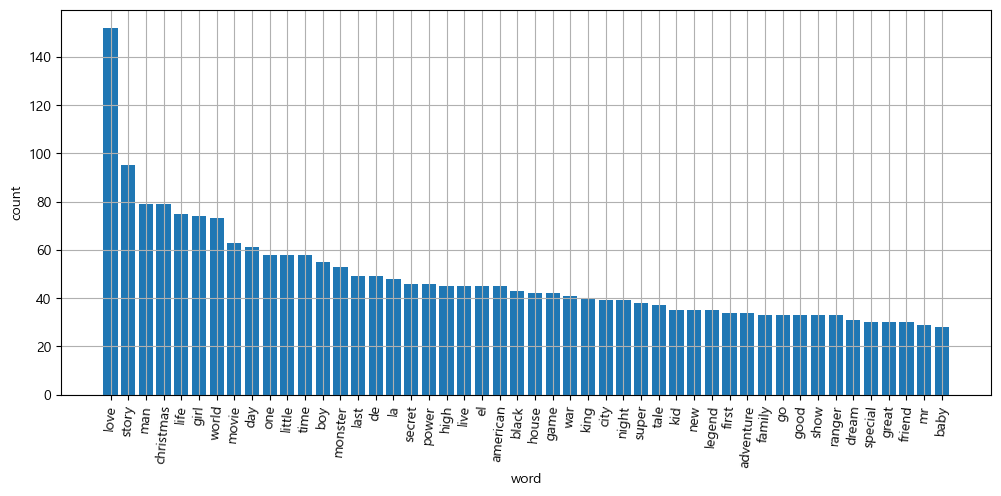

In [25]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys=sorted(word_count,key=word_count.get,reverse=True)
sorted_Values=sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align = "center")
plt.xticks(range(len(word_count)), list(sorted_Keys) , rotation=85)
plt.show()

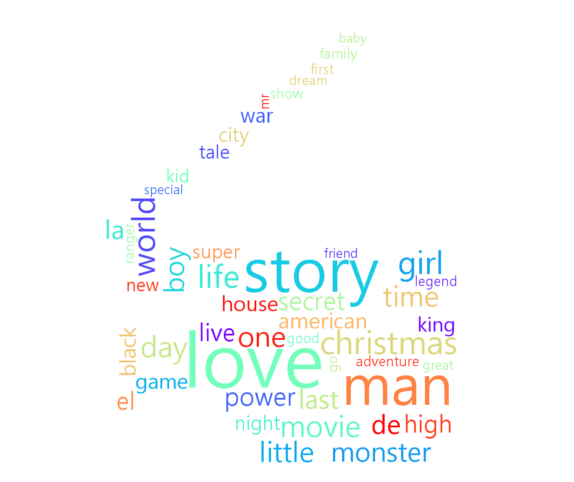

In [31]:
from PIL import Image,ImageFilter
masking_image = np.array(Image.open("C:\\Users\\user\\0Data\\0923_text\\movie.png"))

wc = WordCloud(font_path="C:/Windows/fonts/malgun.ttf",
               width=800, height=600, 
               mask=masking_image,  # masking
               background_color='white',
               colormap='rainbow'  # 컬러맵 추가
               ).generate_from_frequencies(word_count)

plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

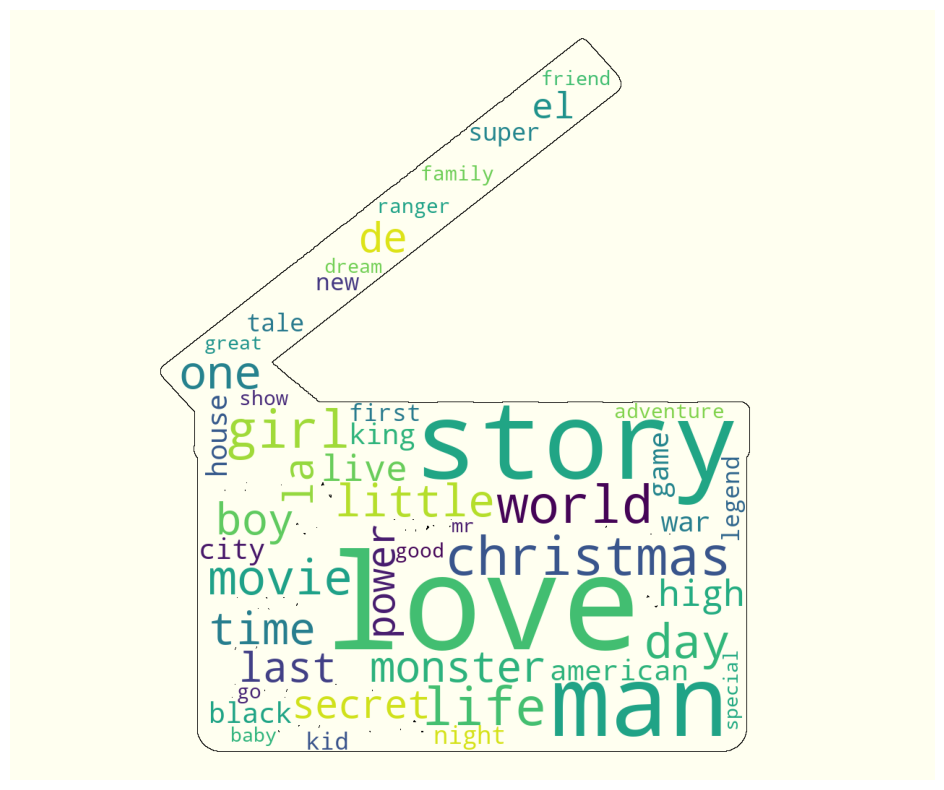

In [27]:
from PIL import Image,ImageFilter
import numpy as np
alice_mask=Image.open('C:/Users/user/0Data/0923_text/movie.png')
alice_mask=alice_mask.filter(ImageFilter.GaussianBlur(1))
alice_mask = np.array(alice_mask)

stopwords = set(STOPWORDS)
wc = WordCloud(
                background_color = 'ivory',
                mask=alice_mask, 
                contour_color='black',
                contour_width=0.5,  
                stopwords = stopwords, 
                width = 800, 
                height = 600)

cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [11]:
#넷플릭스 자료중 설명에서 단어 빈도수 찾기 
all_title=df["description"]
all_title

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [13]:
stopWords=set(stopwords.words("english"))
lemma=WordNetLemmatizer()

In [15]:
words=[]
for title in all_title: 
    
    #알파벳으로 시작하지 않는 단어 공백으로 치환해서 제거 정규식사용
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    
    # 소문자로 변환후 토큰화(단어를 하나하나 쪼갬)
    EnWordsToken = word_tokenize(EnWords.lower()) 
    
    #의미가 없는 단어(불용어 ex:the,is)들을 제거 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    
    #남은단어들의 표제어(기본형으로 바꿈 ex:playong=play) 추출
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    
    words.append(EnWordsTokenStopLemma) #처리다된것들을 리스트에 추가

In [19]:
words2=list(reduce(lambda x,y:x+y,words))
print(words2)

['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slum', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'devastating', 'earthquake', 'hit', 'mexico', 'city', 'trapped', 'survivor', 'walk', 'life', 'wait', 'rescued', 'trying', 'desperately', 'stay', 'alive', 'army', 'recruit', 'found', 'dead', 'fellow', 'soldier', 'forced', 'confront', 'terrifying', 'secret', 'haunting', 'jungle', 'island', 'training', 'camp', 'postapocalyptic', 'world', 'rag', 'doll', 'robot', 'hide', 'fear', 'dangerous', 'machine', 'exterminate', 'brave', 'newcomer', 'join', 'group', 'brilliant', 'group', 'student', 'become', 'card', 'counting', 'expert', 'intent', 'swindling', 'million', 'la', 'vega', 'casino', 'playing', 'blackjack', 'genetics', 'professor', 'experiment', 'treatment', 'comatose', 'sister', 'blend', 'medical', 'shamanic', 'cure', 'unlocks', 'shocking', 'side', 'effect', 'awful', 'accident', 'couple', 'admitted', 'grisly', 'hospital', 'separated', 'must', 'find', 'escape', '

In [21]:
count=Counter(words2)
count

Counter({'life': 1008,
         'young': 655,
         'family': 620,
         'new': 613,
         'woman': 592,
         'find': 578,
         'friend': 548,
         'world': 521,
         'love': 496,
         'man': 490,
         'two': 443,
         'take': 439,
         'year': 430,
         'series': 358,
         'one': 346,
         'get': 339,
         'must': 332,
         'documentary': 329,
         'school': 312,
         'help': 300,
         'story': 296,
         'father': 294,
         'home': 282,
         'old': 279,
         'high': 274,
         'three': 263,
         'girl': 257,
         'secret': 239,
         'group': 235,
         'teen': 235,
         'team': 233,
         'set': 230,
         'student': 226,
         'try': 219,
         'go': 217,
         'make': 210,
         'murder': 206,
         'son': 205,
         'time': 205,
         'star': 204,
         'daughter': 202,
         'special': 201,
         'city': 200,
         'fall': 199,
     

In [23]:
word_count=dict()

for tag,counts in count.most_common(50):
    if(len(str(tag))>1): #and tag != 'data':
        word_count[tag]=counts
        print("%s : %d" % (tag,counts))

life : 1008
young : 655
family : 620
new : 613
woman : 592
find : 578
friend : 548
world : 521
love : 496
man : 490
two : 443
take : 439
year : 430
series : 358
one : 346
get : 339
must : 332
documentary : 329
school : 312
help : 300
story : 296
father : 294
home : 282
old : 279
high : 274
three : 263
girl : 257
secret : 239
group : 235
teen : 235
team : 233
set : 230
student : 226
try : 219
go : 217
make : 210
murder : 206
son : 205
time : 205
star : 204
daughter : 202
special : 201
city : 200
fall : 199
mother : 198
show : 198
death : 197
boy : 197
save : 197
turn : 197


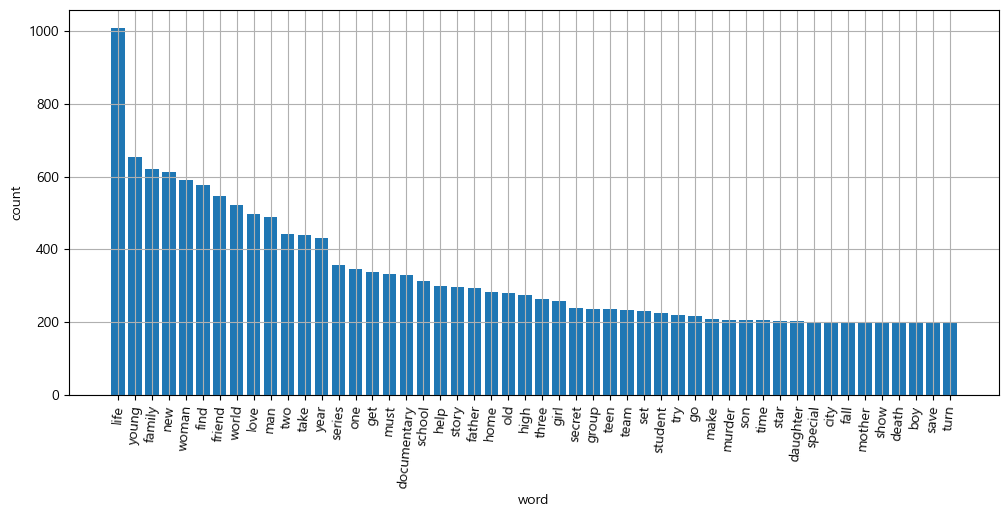

In [25]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys=sorted(word_count,key=word_count.get,reverse=True)
sorted_Values=sorted(word_count.values(),reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align = "center")
plt.xticks(range(len(word_count)), list(sorted_Keys) , rotation=85)
plt.show()

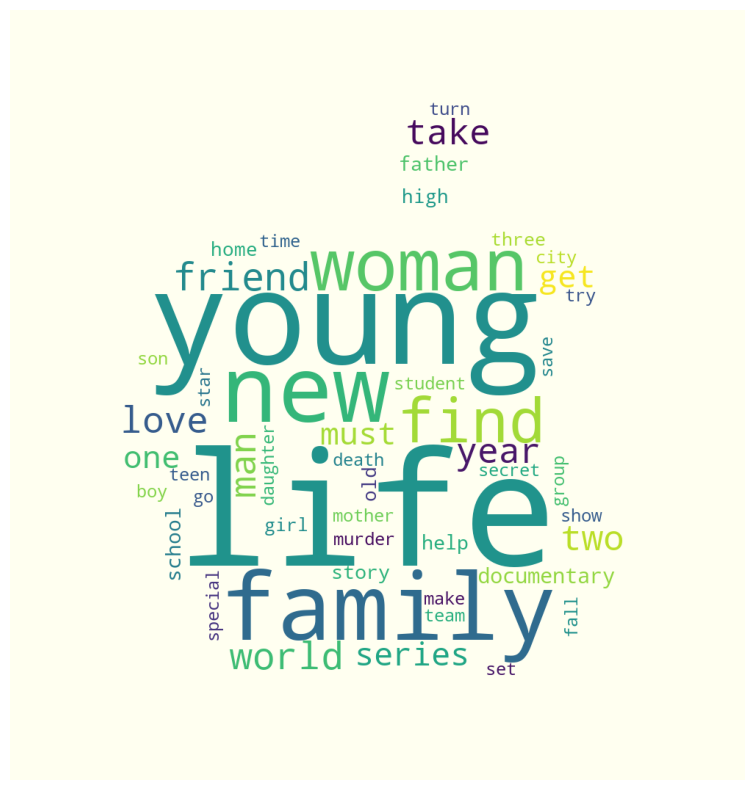

In [49]:
from PIL import Image,ImageFilter
import numpy as np
alice_mask=Image.open('C:/Users/user/0Data/0923_text/44.jpg')
alice_mask=alice_mask.filter(ImageFilter.GaussianBlur(1))
alice_mask = np.array(alice_mask)

stopwords = set(STOPWORDS)
wc = WordCloud(
                background_color = 'ivory',
                mask=alice_mask, 
                stopwords = stopwords, 
                width = 800, 
                height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [57]:
#연도별 발매한수 찾아보기 
df["count"]=0
summary_year=df.groupby("release_year",as_index=False)["count"].count()
summary_year

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16040\1350336843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count"]=0


,release_year,count
0,2000,34
1,2001,36
2,2002,45
3,2003,49
4,2004,59
5,2005,73
6,2006,85
7,2007,85
8,2008,125
9,2009,137


In [53]:
df = df[df['release_year'] >= 2000]

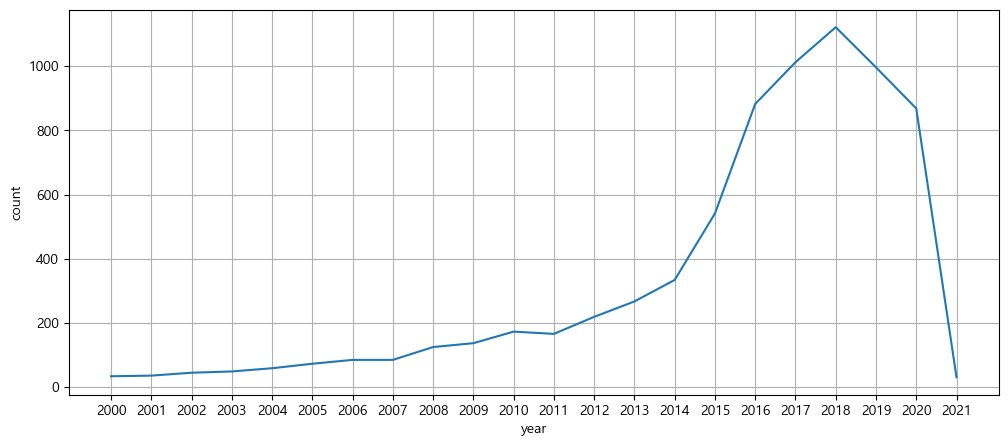

In [59]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['release_year']])
plt.show()